# Copyrights
1. textbook official repository: https://github.com/WegraLee/deep-learning-from-scratch
1. fork source: https://github.com/ExcelsiorCJH/DLFromScratch [(chapter2)](https://nbviewer.jupyter.org/github/ExcelsiorCJH/DLFromScratch/blob/master/Chap02-Perceptron/Chap02-Perceptron.ipynb)
1. additional repository: https://github.com/SDRLurker/deep-learning [(chapter2)](https://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/2%EC%9E%A5.ipynb)

### Customized by Gil-Jin Jang

# Chap03 - 신경망

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

신경망을 그림으로 나타내면 아래와 같다. 입력층, 은닉층, 출력층은 차례로 0층, 1층, 2층이라 하고 아래의 그림은 **2층 신경망**이다. 그 이유는 가중치($w$, weight)를 갖는 층은 2개뿐이기 때문이다.

<!-- <img src="./images/3-01.png" width="50%" height="50%"/> -->
<img src="./images/neurons.png" width="80%" height="80%"/>

출처: http://happycontrol.tistory.com/entry/인공신경망1

### 3.1.2 퍼셉트론 복습

신경망의 신호 전달 방법을 알아보기 전에 [2장](https://github.com/ExcelsiorCJH/DLFromScratch/blob/master/Chap02-Perceptron/Chap02-Perceptron.ipynb)에서 배웠던 퍼셉트론을 복습해보자. 

<img src="./images/3-03.png" width="30%" height="30%"/>

$$
y=\begin{cases} 0\quad (b + w_1x_1 +w_2x_2 \le 0) \\ 1 \quad (b + w_1x_1 + w_2x_2 > 0) \end{cases}
$$

여기서 $b$는 **편향(bias)** 을 나타내는 매개변수로 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다. $w_1$과 $w_2$는 각 신호의 **가중치(weight)** 를 나타내는 매개변수로, 각 신호의 영향력을 제어한다.

위의 식을 다음과 같이 더 간결한 형태로 나타내보자.

$$
y = h(b+ w_1 x_1 + w_2 x_2)
$$
$$
y = h(x)=\begin{cases} 0\quad (x \le 0) \\ 1 \quad (x > 0) \end{cases}
$$

위의 식에서 입력의 총합($b+ w_1 x_1 + w_2 x_2$)이 $h(x)$라는 함수를 거쳐 변환된 뒤, 그 출력값이 $y$가 된다.

### 3.1.3 활성화 함수의 등장

위에서 $h(x)$라는 함수처럼, 입력 신호의 총합을 출력 신호로 변환하는 함수를 **활성화 함수(activation function)** 이라고 한다. 이름에서도 알 수 있듯이 활성화 함수는 입력 신호의 총합이 **활성화를 일으키는지를 정하는 역할**을 한다. 위의 식을 다시 써보고 이를 그림으로 나타내 보자.

$$
a = b + w_1 x_1 + w_2 x_2
$$
$$
y = h(a)
$$

<img src="./images/3-04.png" width="30%" height="30%"/>

## 3.2 활성화 함수

활성화 함수는 임계값(0)을 경계로 출력이 변하는데, 이런 함수를 **계단함수(step function)** 라 한다. 따라서, "퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다"라고 할 수 있다. 

그렇다면, 계단함수 말고 다른 함수를 사용하면 어떻게 될까? 이것이 바로 신경망으로 나아가는 핵심이 된다.

### 3.2.1 시그모이드 함수

신경망에서 자주 사용되는 활성화 함수 중 하나는 **시그모이드 함수(sigmoid function)**다. 시그모이드(sigmoid)란 'S자 모양'이라는 뜻으로 그래프의 모양을 따서 지은 것이라 한다.

$$
h(x) = \frac{1}{1 + \text{exp}(-x)}
$$

<img src="./images/3-07.png" width="50%" height="50%"/>

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다. 2장에서 알아본 퍼셉트론과 신경망과의 주된 차이는 활성화 함수라고 할 수 있다.

### 3.2.2 계단 함수 구현하기
계단 함수: 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력

In [1]:
# 인수 x는 실수(부동소수점)만 받아들임.
# 넘파이 배열을 인수로 넣을 수 없음.
def step_function(x):
    if x > 0: return 1
    else: return 0

In [2]:
# 넘파이의 트릭을 사용하여 구현. 넘파이 배열도 인수로 넣을 수 있음.
# in textbook, type 'np.int' is used, but deprecated. 
# use plain type 'int' instead
def step_function(x):
    y = x > 0
    return y.astype(int)

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)

[-1.  1.  2.]


- 넘파이 배열에서 부등호 연산을 수행하면 원소 각각에 부등호 연산을 수행한 bool배열이 생성
- 배열 x의 원소 각각이 0보다 크면 True, 0 이하면 False로 변환한 새로운 배열 y가 생성
- astype() 메서드: 넘파이 배열의 자료형을 변환
- 파이썬에서는 bool을 int로 변환하면 True는 1로, False는 0으로 변환

In [4]:
y = x > 0
print(y)
print(type(y))

[False  True  True]
<class 'numpy.ndarray'>


### 3.2.3 계단 함수의 그래프
계단 함수: 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력

In [5]:
import numpy as np
import matplotlib.pylab as plt

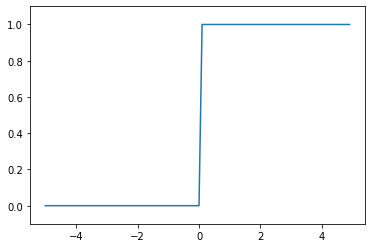

In [6]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

이번에는 시그모이드 함수를 구현해보자. 

- np.exp(-x)는 exp(-x) 수식에 해당. 인수 x가 넘파이 배열이어도 올바른 결과가 나옴
- __브로드캐스트__: 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 바꿔 수행

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)

[2. 3. 4.]


In [9]:
# np.exp(-x)가 넘파이 배열을 반환하기 때문에 1 / 1 + np.exp(-x))도 넘파이 배열의 각 원소에 연산을 수행한 결과를 냄
print(1.0 / t)

[1.         0.5        0.33333333]


Draw sigmoid function:

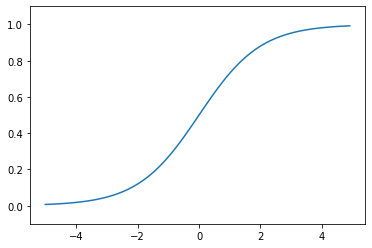

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

In [11]:
x = np.array([-1., 1., 2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

### 3.2.5 시그모이드 함수와 계단 함수 비교

계단함수와 시그모이드 함수를 각각 살펴보았다. 이제 두 함수의 차이가 무엇인지 알아보자. 

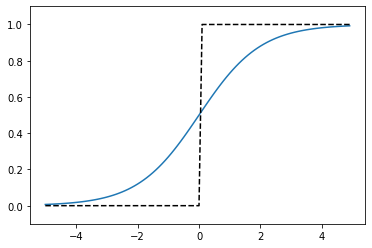

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

위의 그래프에서 볼 수 있듯이, 계단함수와 시그모이드 함수의 차이는 **'연속성'** 이다. 시그모이드 함수는 곡선이며 입력에 따라 출력이 연속적으로 변하지만, 계단함수는 0을 기준으로 출력이 불연속적으로 변한다. 이러한 시그모이드 함수의 연속성이 신경망 학습에서 중요한 역할을 하게된다.

그리고 계단함수는 0과 1 중 하나의 값만 반환하는 반면, 시그모이드 함수는 0과 1사이의 실수(0.723..., 0.232... 등)를 반환한다. 즉, 퍼셉트론에서는 뉴런(노드)사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다. 계단함수와 시그모이드 함수 둘 다 입력이 중요하면 큰 값(1에 가까운)을 출력하고 입력이 중요하지 않으면 작은값(0에 가까운)을 출력하며, 입력이 아무리 크거나 작아도 시그모이드 함수의 출력은 항상 0에서 1사이이다.

### 3.2.6 비선형 함수

시그모이드 함수는 **비선형 함수(non-linear function)**이다. 

> **신경망에서는 활성화 함수로 비선형 함수를 사용해야한다.** 

왜 그럴까? 그 이유는 선형함수를 이용하면 신경망의 층을 깊게 하는 의미가 없기 때문이다. 예를 들어 활성화 함수로 $h(x) = cx$를 사용하여 3층 신경망을 구성한다고 하면 $y(x) = h(h(h(x)))$이 되며 이것은 $y(x) = c \times c \times c \times x = c^3 x$ 같다. 즉, 활성화 함수를 $h(x) = c^3 x$로 한번만 사용하여 나타낼 수 있기 때문에 여러 층으로 신경망을 구성하는 이점을 살릴 수 없다.

### 3.2.7 ReLU 함수

신경망에서 자주 사용되는 또다른 활성화 함수인 **ReLU(Rectified Linear Unit, 렐루)**에 대해 알아보자. ReLU는 입력이 0을 넘으면 입력 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다. 

$$
h(x)=\begin{cases} x \quad (x > 0) \\ 0 \quad (x \le 0) \end{cases}
$$

<img src="./images/3-09.png" width="50%" height="50%"/>

In [13]:
def relu(x):
    return np.maximum(0, x)

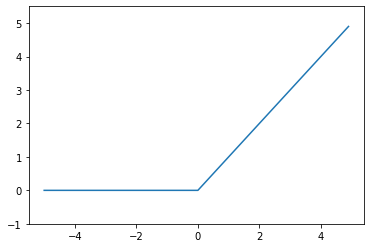

In [14]:
# drawing ReLU function
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)  # y축의 범위 지정
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

여기서는`numpy`를 이용한 다차원 배열에 대해 알아보자.

In [15]:
import numpy as np

In [16]:
# 1차원 배열
A = np.array([1, 2, 3, 4])
print(A)
print('np.ndim(A) :', np.ndim(A))
print('A.shape :', A.shape)
print('A.shape[0] :', A.shape[0])

[1 2 3 4]
np.ndim(A) : 1
A.shape : (4,)
A.shape[0] : 4


In [17]:
# 2차원 배열
B = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])

print(B)
print('np.ndim(B) :', np.ndim(B))
print('B.shape :', B.shape)
print('B.shape[0] :', B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
np.ndim(B) : 2
B.shape : (3, 2)
B.shape[0] : 3


### 3.3.2 행렬의 내적(행렬 곱)

<img src="./images/3-11.png" width="60%" height="60%"/>

In [18]:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]]) 

print('A.shape :', A.shape)
print('B.shape :', B.shape)
print('np.dot(A,B) :\n', np.dot(A, B))

A.shape : (2, 2)
B.shape : (2, 2)
np.dot(A,B) :
 [[19 22]
 [43 50]]


### 3.3.3 신경망의 내적

아래의 그림처럼 간단한 신경망 예제를 통해 신경망 내적을 계산 해보자.

<img src="./images/3-14.png" width="70%" height="70%"/>

In [19]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], 
              [2, 4, 6]])

Y = np.dot(X, W)

print('X.shape :', X.shape)
print('W.shape :', W.shape)
print('Y:', Y)

X.shape : (2,)
W.shape : (2, 3)
Y: [ 5 11 17]


## 3.4 3층 신경망 구현하기

이번에는 아래 그림 처럼 3층 신경망을 구현해 보도록 하자.

<img src="./images/3-15.png" width="65%" height="65%"/>

### 3.4.1 표기법 설명

<img src="./images/3-16.png" width="65%" height="65%"/>

### 3.4.2 각 층의 신호 전달 구현하기


#### 1) 입력층에서 1층으로 신호전달

<img src="./images/3-17.png" width="65%" height="65%"/>

위의 그림에서 $a_{1}^{(1)}$에 대해 가중치 및 편향의 합으로 나타내면 다음과 같다. 

$$
a_{1}^{(1)} = w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_{1}^{(1)}
$$

마찬가지로 $a_{2}^{(1)}$, $a_{3}^{(1)}$에 대해 이를 행렬의 내적을 이용하여 나타내면 아래와 같이 간소화 할 수 있다.

$$
\mathbf{A}^{(1)} = \mathbf{XW}^{(1)} + \mathbf{B}^{(1)}
$$

이때 행렬 $\mathbf{A}^{(1)}$, $\mathbf{X}$, $\mathbf{B}^{(1)}$, $\mathbf{W}^{(1)}$은 다음과 같다.

$$
\mathbf{A}^{(1)} = \begin{bmatrix} { a }_{ 1 }^{ (1) } & { a }_{ 2 }^{ (1) } & { a }_{ 3 }^{ (1) } \end{bmatrix}, \quad \mathbf{X} = \begin{bmatrix} { x }_{ 1 } & x_{ 2 } \end{bmatrix}, \quad \mathbf{B}^{(1)} = \begin{bmatrix} { b }_{ 1 }^{ (1) } & { b }_{ 2 }^{ (1) } & { b }_{ 3 }^{ (1) } \end{bmatrix}
$$

$$
\mathbf{W}^{(1)} = \begin{bmatrix} { w }_{ 11 }^{ (1) } & { w }_{ 21 }^{ (1) } & { w }_{ 31 }^{ (1) } \\ { w }_{ 12 }^{ (1) } & { w }_{ 22 }^{ (1) } & { w }_{ 32 }^{ (1) } \end{bmatrix}
$$

In [20]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], 
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print('W1.shape :', W1.shape)
print('X.shape :', X.shape)
print('B1.shape :', B1.shape)

A1 = np.dot(X, W1) + B1
print('A1.shape :', A1.shape)
print('A1 :', A1)

W1.shape : (2, 3)
X.shape : (2,)
B1.shape : (3,)
A1.shape : (3,)
A1 : [0.3 0.7 1.1]


#### 2) 입력층에서 1층으로 신호전달 후 활성화 함수 적용

<img src="./images/3-18.png" width="65%" height="65%"/>

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)

print('A1 :', A1)
print('Z1 :', Z1)

A1 : [0.3 0.7 1.1]
Z1 : [0.57444252 0.66818777 0.75026011]


#### 3) 1층에서 2층으로 신호 전달

<img src="./images/3-19.png" width="65%" height="65%"/>

In [22]:
W2 = np.array([[0.1, 0.4], 
               [0.2, 0.5], 
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print('Z1.shape :', Z1.shape)
print('W2.shape :', W2.shape)
print('B2.shape :', B2.shape)

A2 = np.dot(Z1, W2) + B2  # 신호 합
Z2 = sigmoid(A2)  # 활성화함수 값

print('A2 :', A2)
print('Z2 :', Z2)

Z1.shape : (3,)
W2.shape : (3, 2)
B2.shape : (2,)
A2 : [0.51615984 1.21402696]
Z2 : [0.62624937 0.7710107 ]


#### 4) 2층에서 출력층으로의 신호 전달

<img src="./images/3-20.png" width="65%" height="65%"/>

In [23]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], 
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  # Y = A3

print('W3.shape :', W3.shape)
print('B3.shape :', B3.shape)
print('A3.shape :', A3.shape)
print('Y.shape :', Y.shape)

print('A3 :', A3)
print('Y :', Y)

W3.shape : (2, 2)
B3.shape : (2,)
A3.shape : (2,)
Y.shape : (2,)
A3 : [0.31682708 0.69627909]
Y : [0.31682708 0.69627909]


### 3.4.3 구현 정리

위에서 구현한 것을 정리해 보도록 하자

In [24]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], 
                              [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], 
                              [0.2, 0.5], 
                              [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], 
                              [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network  # dictionary return


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

신경망은 분류(classification)와 회귀(regression) 둘 다 사용할 수 있다. 대신, 분류인지 회귀인지에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀에는 **항등 함수**를 사용하며, 분류에는 **소프트맥스 함수**를 사용한다.

### 3.5.1~2 항등 함수와 소프트맥스 함수 구현하기

**항등 함수**(identity function)는 입력을 그대로 출력한다. 분류에 사용하는 **소프트맥스 함수**(softmax function)의 식은 다음과 같다.

$$
y_k = \frac{\text{exp}(a_k)}{\sum_{i = 1}^{n}{\text{exp}(a_i)}}
$$

In [25]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


a = np.array([0.3, 2.9, 4.0])
print('a :', a)
print('softmax(a) :', softmax(a))

a : [0.3 2.9 4. ]
softmax(a) : [0.01821127 0.24519181 0.73659691]


### 3.5.3 소프트맥스 함수의 특징

In [26]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print('y :', y)
print('np.sum(y) :', np.sum(y))

y : [0.01821127 0.24519181 0.73659691]
np.sum(y) : 1.0


위의 출력결과 에서 볼 수 있듯이 소프트맥스 함수 출력의 총합은 1이다. 이러한 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

 MNIST는 미국 인구조사국의 직원들이 쓴 숫자와 고등학생들이 쓴 숫자로 만든 미국 국립표준기술연구소(NIST)의 데이터베이스를 다시 섞어 만든 필기체 숫자 이미지 데이터베이스이다. 

MNIST 데이터는 딥러닝 예제에서 빠지지 않고 등장하는 데이터라고 할 수 있다.

![](./images/mnist.png)

In [27]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from IPython.core.pylabtools import figsize
from dataset.mnist import load_mnist

In [28]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print('x_train.shape :', x_train.shape)
print('t_train.shape :', t_train.shape)
print('x_test.shape :', x_test.shape)
print('t_test.shape :', t_test.shape)

x_train.shape : (60000, 784)
t_train.shape : (60000,)
x_test.shape : (10000, 784)
t_test.shape : (10000,)


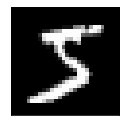

In [29]:
figsize(2, 2)
img = x_train[0].reshape(28, 28)
plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([]);

### 3.6.2 신경망의 추론 처리

이 예제에서는 `sample_weight.pkl`에 사전에 '학습된 가중치 매개변수'를 이용해 MNIST 데이터를 분류한다.

![](./images/mnist_nn.png)

In [30]:
import sys, os
import pickle
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

In [31]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, 
                                                      flatten=True, 
                                                      one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("./sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [32]:
x, t = get_data()
network = init_network()

In [33]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


위의 예제코드는 `neuralnet_mnist.py`를 jupyter notebook에 그대로 옮긴 것이다. 

`get_data()`에서 MNIST 데이터를 불러올 때 `normalize=True`로 해서 데이터를 불러온다. `normalize`를 `True`로 설정하면 이미지의 pixel 값의 범위인 0~255의 값을 255로 나눠, 0.0 ~ 1.0 범위로 변환 해준다. 

### 3.6.3 배치 처리

먼저 위에서 작성한 코드는 `for`문을 돌면서, 숫자 이미지 **1 개**가 입력 되었을 때 분류를 수행하는 코드이다.
이를 그림으로 나타내면 아래와 같다.

<img src="./images/3-26.png" width="70%" height="70%"/>

이번에는 이미지 1 개가 아닌 **여러개**를 입력하여 출력결과 또한 여러개를 출력하도록 구성해보자. 아래의 그림은 100개의 이미지를 입력했을 때, 100개의 출력이 나오는 것을 나타낸 것이다. 이렇게 여러개를 하나의 입력 단위로 묶은 것을 **배치(batch)** 라고 한다.

<img src="./images/3-27.png" width="70%" height="70%"/>

In [34]:
x, t = get_data()
network = init_network()

In [35]:
batch_size = 100  # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


## 3.7 정리

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- numpy의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수로 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.